In [1]:
import numpy as np
import utils
from genclassif_module import GenRec, transform, torchdevice
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torch.utils import data
from torchvision.datasets import ImageFolder

from argparse import Namespace

face_dir = f"{utils.root}data/images/faces"
raw_dataset = ImageFolder(face_dir)
target_dataset = ImageFolder(face_dir, transform)

def evaluate(model):
    correctes = 0
    model.eval()
    for i,((x,_), (raw,_)) in enumerate(zip(target_dataset, raw_dataset)):
        face = x.unsqueeze(0)
        pred = model.forward(face).item()
        correctes += round(pred)==labels[i].item()
        plt.imshow(raw)
        plt.title(f"Pr(man) = {round(pred, 4)}")
        plt.show()
    print("Accuracy:", correctes/(i+1))

/home/emili/anaconda3/envs/gender_recognition/lib/python3.6/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [10]:
# Representar espai de característiques generat pel feature extractor
import pandas as pd
import umap
from sklearn.decomposition import PCA

import pandas as pd
import umap
import io
import plotly.express as px
from PIL import Image
from tqdm import tqdm

def umap_3dscatter(embeddings):
    umap3d = pd.DataFrame.from_records(umap.UMAP(n_components=3).fit_transform(embeddings),
                                columns = ["d1", "d2", "d3"])
    fig = px.scatter_3d(
        data_frame=umap3d,
        x="d1",
        y="d2",
        z="d3"
    )
    fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False)
    return fig

def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

def umap_3dvideo(embeddings, x_eye=-1.25, y_eye=2, z_eye=0.5, name="3d_embd_space"):
    fig = umap_3dscatter(embeddings)

    frames = []
    for t in tqdm(np.arange(0, 2*np.pi, 0.05)):
        xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
        fig.update_layout(
            width=1000,
            height=1000,
            scene_camera_eye=dict(x=xe, y=ye, z=ze)
        )
        frames.append(Image.open(io.BytesIO(fig.to_image(format="png"))))
    
    frames[0].save(fp=f"{utils.root}data/videos/{name}.gif", format='GIF', append_images=frames[1:],
                   save_all=True, duration=50, loop=0)

In [2]:
listed_labels = [1, 0, 1, 1, 1,  # 0 a 4
                 1, 1, 1, 1, 1,  # 5 a 9
                 1, 1, 1, 1, 0,  # 10 a 14
                 1, 1, 1, 1, 1,  # 15 a 19
                 1, 1, 1, 1, 0,  # 20 a 24
                 1, 1, 1, 0, 1,  # 25 a 29
                 0, 1, 0, 1, 0,  # 30 a 34
                 0, 1, 1, 1, 1]  # 35 a 39

labels = torch.FloatTensor(listed_labels)
images = torch.stack([x for x,_ in target_dataset])
ds = data.TensorDataset(images, labels)
tr_dloader = data.DataLoader(ds, batch_size=len(ds), shuffle=True, num_workers=2, drop_last=True)
va_dloader = data.DataLoader(ds, batch_size=len(ds), shuffle=True, num_workers=2, drop_last=True)
dloaders = {"train":tr_dloader, "valid":va_dloader}

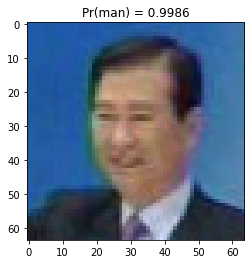

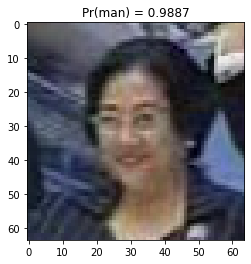

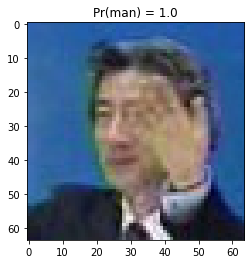

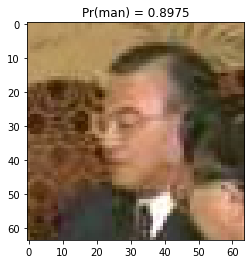

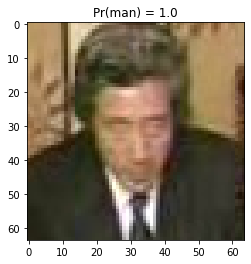

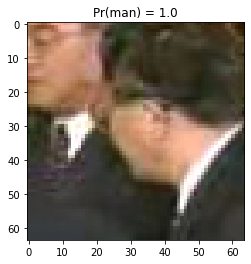

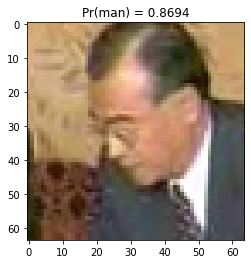

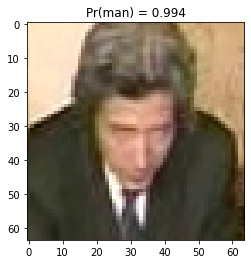

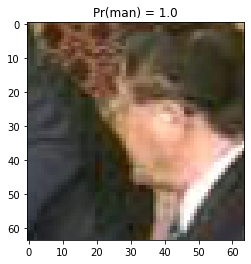

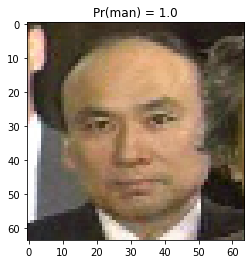

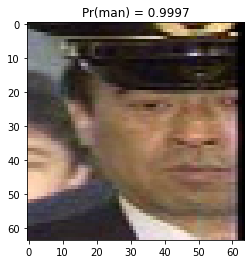

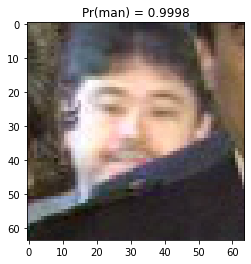

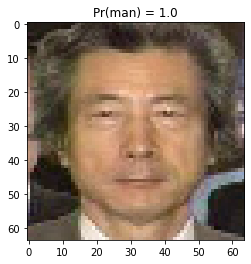

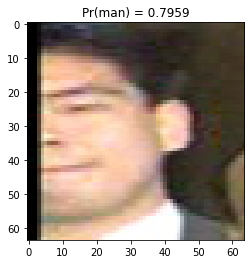

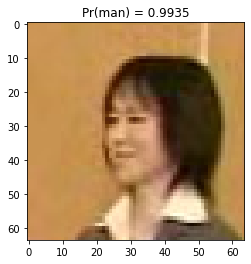

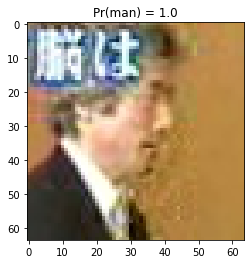

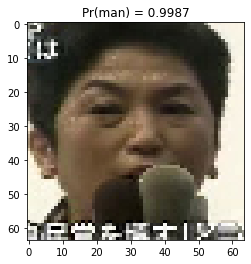

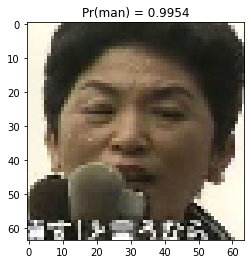

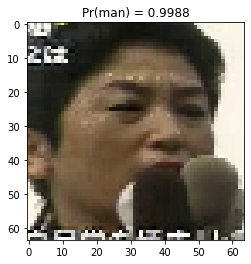

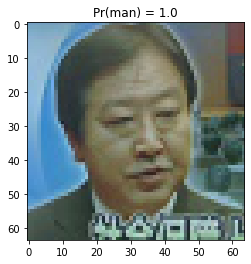

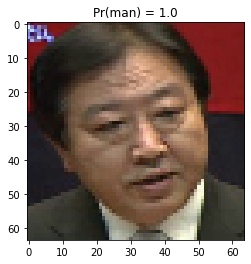

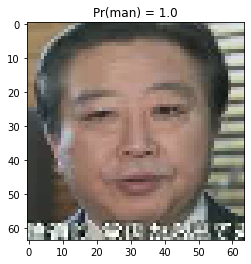

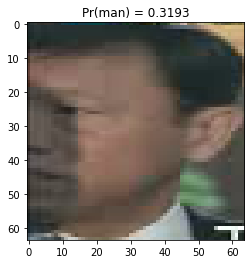

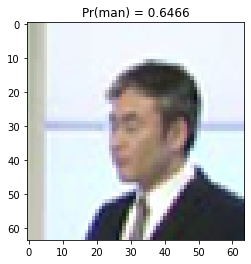

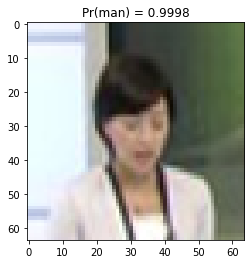

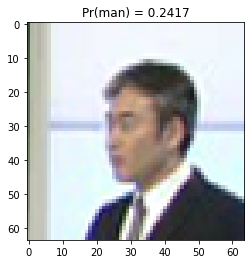

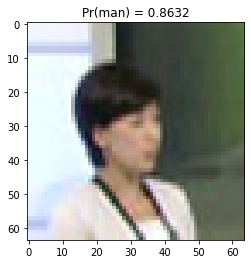

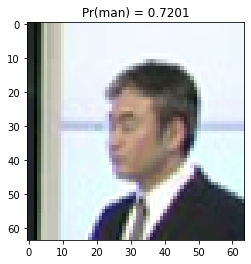

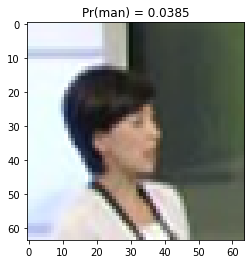

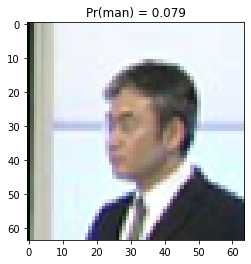

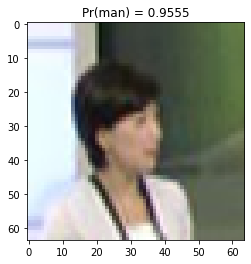

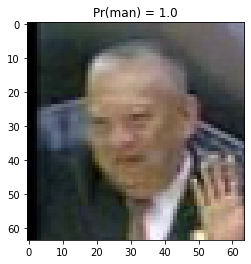

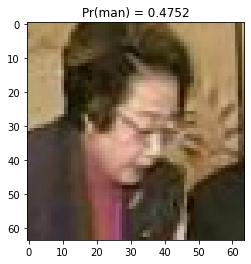

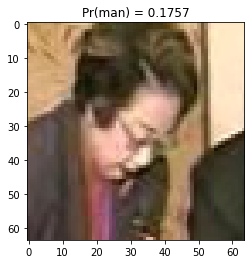

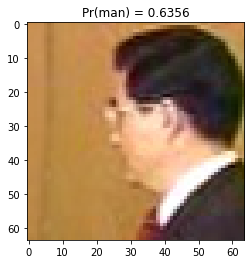

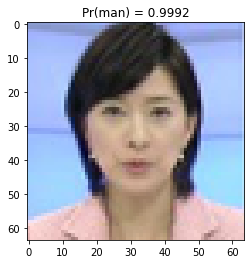

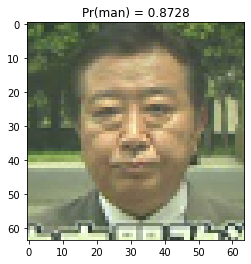

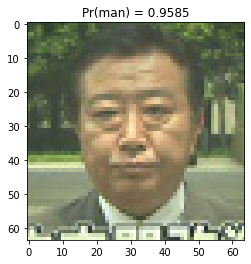

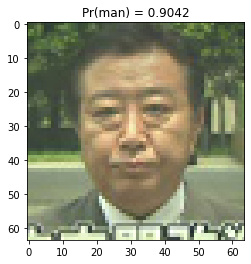

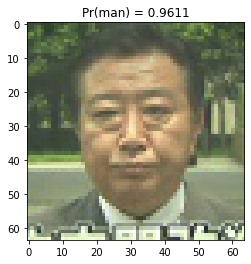

Accuracy: 0.75


In [3]:
model_offtheshelf = GenRec()
model_offtheshelf.load_state_dict(torch.load(f"{utils.root}checkpoints/pretrained_model_checkpoint.pth", map_location=torch.device("cpu")))

evaluate(model_offtheshelf)

In [5]:
hparams = Namespace(
    num_epochs=50,
    device=torchdevice
)

model_overfit = GenRec()
optimizer = optim.Adam(model_overfit.parameters(), lr=1e-2, amsgrad=True)
_ = model_overfit.train_model(dloaders, optimizer, hparams, wb_run=None, prints=True)

Epoch 1/50
[train] Loss: 0.6409 | Acc: 0.8000
[valid] Loss: 20.0000 | Acc: 0.8000
Epoch 2/50
[train] Loss: 0.6771 | Acc: 0.8000
[valid] Loss: 20.0000 | Acc: 0.8000
Epoch 3/50
[train] Loss: 0.5330 | Acc: 0.8000
[valid] Loss: 20.0000 | Acc: 0.8000
Epoch 4/50
[train] Loss: 2.0637 | Acc: 0.8000
[valid] Loss: 20.0000 | Acc: 0.8000
Epoch 5/50
[train] Loss: 0.5274 | Acc: 0.8000
[valid] Loss: 20.0000 | Acc: 0.8000
Epoch 6/50
[train] Loss: 0.5949 | Acc: 0.8000
[valid] Loss: 20.0000 | Acc: 0.8000
Epoch 7/50
[train] Loss: 0.5165 | Acc: 0.8000
[valid] Loss: 20.0000 | Acc: 0.8000
Epoch 8/50
[train] Loss: 0.4476 | Acc: 0.8000
[valid] Loss: 20.0000 | Acc: 0.8000
Epoch 9/50
[train] Loss: 0.4235 | Acc: 0.8000
[valid] Loss: 20.0000 | Acc: 0.8000
Epoch 10/50
[train] Loss: 0.4275 | Acc: 0.8000
[valid] Loss: 20.0000 | Acc: 0.8000
Epoch 11/50
[train] Loss: 0.4105 | Acc: 0.8000
[valid] Loss: 20.0000 | Acc: 0.8000
Epoch 12/50
[train] Loss: 0.3680 | Acc: 0.8000
[valid] Loss: 20.0000 | Acc: 0.8000
Epoch 13/50
[

In [4]:
hparams = Namespace(
    num_epochs=50,
    device=torchdevice
)

# MLP model
model_mlp = GenRec()
model_mlp.load_state_dict(torch.load(f"{utils.root}checkpoints/pretrained_model_checkpoint.pth", map_location=torch.device("cpu")))

print("Starting training of overfitting MLP model")
model_mlp.train()
optimizer = optim.Adam(model_mlp.MLP.parameters(), lr=1e-2, amsgrad=True)
_ = model_mlp.train_model(dloaders, optimizer, hparams, wb_run=None, prints=True)

# Dropout model
model_dropout = GenRec(dropout=0.05)
model_dropout.load_state_dict(torch.load(f"{utils.root}checkpoints/pretrained_model_checkpoint.pth", map_location=torch.device("cpu")))

print("Starting training of dropout full model")
model_dropout.train()
optimizer = optim.Adam(model_dropout.parameters(), lr=1e-2, amsgrad=True)
_ = model_dropout.train_model(dloaders, optimizer, hparams, wb_run=None, prints=True)

# Full model
model_full = GenRec()
model_full.load_state_dict(torch.load(f"{utils.root}checkpoints/pretrained_model_checkpoint.pth", map_location=torch.device("cpu")))

print("Starting training of overfitting full model")
model_full.train()
optimizer = optim.Adam(model_full.parameters(), lr=1e-2, amsgrad=True)
hparams.num_epochs = 20
_ = model_full.train_model(dloaders, optimizer, hparams, wb_run=None, prints=True)

Starting training of overfitting MLP model
Epoch 1/50
[train] Loss: 4.0680 | Acc: 0.5500
[valid] Loss: 0.7962 | Acc: 0.7500
Epoch 2/50
[train] Loss: 1.6814 | Acc: 0.6500
[valid] Loss: 0.6261 | Acc: 0.7500
Epoch 3/50
[train] Loss: 1.3657 | Acc: 0.6750
[valid] Loss: 0.5248 | Acc: 0.7500
Epoch 4/50
[train] Loss: 1.0144 | Acc: 0.6750
[valid] Loss: 0.4875 | Acc: 0.7750
Epoch 5/50
[train] Loss: 0.7024 | Acc: 0.7250
[valid] Loss: 0.5199 | Acc: 0.8250
Epoch 6/50
[train] Loss: 0.5649 | Acc: 0.7250
[valid] Loss: 0.5942 | Acc: 0.8250
Epoch 7/50
[train] Loss: 0.5880 | Acc: 0.7250
[valid] Loss: 0.6520 | Acc: 0.5750
Epoch 8/50
[train] Loss: 0.5543 | Acc: 0.8000
[valid] Loss: 0.6471 | Acc: 0.7250
Epoch 9/50
[train] Loss: 0.5762 | Acc: 0.8000
[valid] Loss: 0.6337 | Acc: 0.8000
Epoch 10/50
[train] Loss: 0.5713 | Acc: 0.8000
[valid] Loss: 0.6167 | Acc: 0.8000
Epoch 11/50
[train] Loss: 0.5539 | Acc: 0.8000
[valid] Loss: 0.5964 | Acc: 0.8000
Epoch 12/50
[train] Loss: 0.5447 | Acc: 0.8000
[valid] Loss: 0.5

In [8]:
print(model_offtheshelf.best_acc)
print(model_full.best_acc)     # 1.0
print(model_mlp.best_acc)      # 0.9
print(model_dropout.best_acc)  # 0.975

In [7]:

model_full.eval(); model_mlp.eval(); model_dropout.eval()

for x,_ in tr_dloader:
    embd_full = pd.DataFrame.from_records(model_full.FE(x).detach().numpy())
    embd_mlp = pd.DataFrame.from_records(model_mlp.FE(x).detach().numpy())
    embd_dropout = pd.DataFrame.from_records(model_dropout.FE(x).detach().numpy())

embd_full.shape

In [7]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

def face_scatter(proj2d, face_paths, zoom=0.3):
    fig, ax = plt.subplots()
    for x0, y0, face in zip(proj2d[:,0], proj2d[:,1], face_paths):
        imscatter(x0, y0, face, zoom=zoom, ax=ax)
        ax.plot(x0, y0)
    plt.axis('off')
    plt.show()

faces = [face for face,_ in raw_dataset]

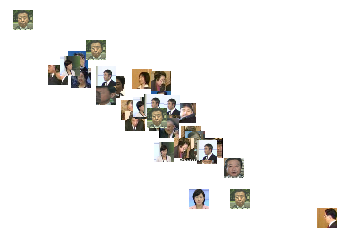

In [8]:
face_scatter(PCA().fit(embd_full).components_[:,:2], faces)

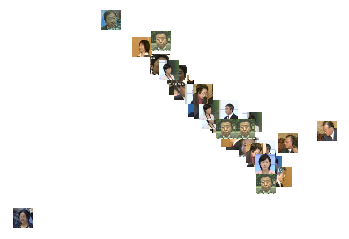

In [9]:
face_scatter(PCA().fit(embd_dropout).components_[:,:2], faces)

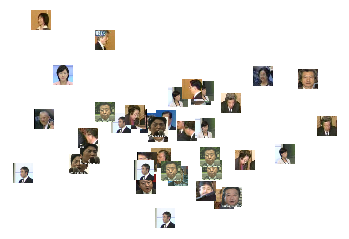

In [10]:
face_scatter(PCA().fit(embd_mlp).components_[:,:2], faces)

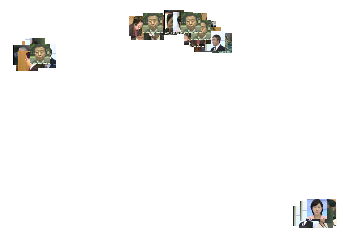

In [11]:
face_scatter(umap.UMAP().fit_transform(embd_full), faces)

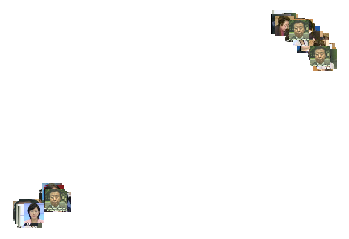

In [12]:
face_scatter(umap.UMAP().fit_transform(embd_dropout), faces)

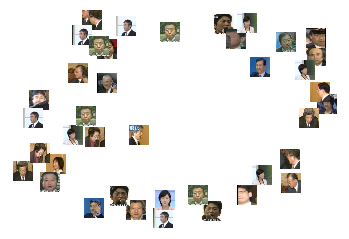

In [13]:
face_scatter(umap.UMAP().fit_transform(embd_mlp), faces, zoom=0.3)

In [24]:
umap_3dvideo(embd_dropout, name="3d_embd_space_dropout")

100%|██████████| 126/126 [02:31<00:00,  1.20s/it]


In [28]:
umap_3dvideo(embd_full, name="3d_embd_space_embd_full")

100%|██████████| 126/126 [02:34<00:00,  1.22s/it]


In [22]:
umap_3dvideo(embd_mlp, name="3d_embd_space_embd_mlp")

100%|██████████| 126/126 [02:22<00:00,  1.13s/it]


In [41]:
fig = umap_3dscatter(embd_dropout)

In [26]:
umap_3dscatter(embd_full)

In [25]:
umap_3dscatter(embd_mlp)

In [12]:
for x,_ in tr_dloader:
    model_overfit.eval()
    embd_overfit = pd.DataFrame.from_records(model_overfit.FE(x).detach().numpy())

In [3]:
umap_3dvideo(embd_overfit, name="3d_embd_space_overfit")

# Low Resolution Pretraining

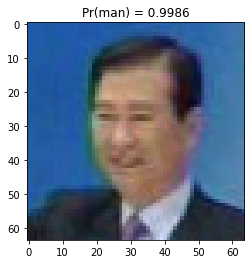

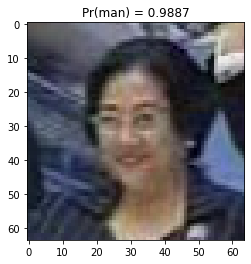

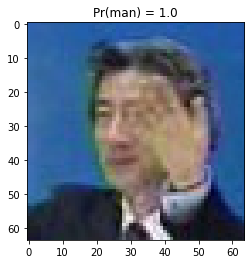

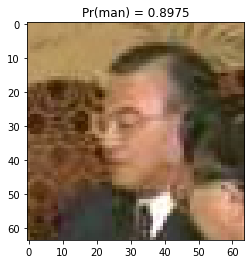

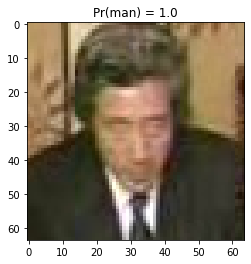

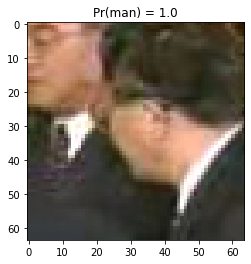

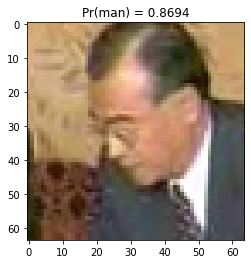

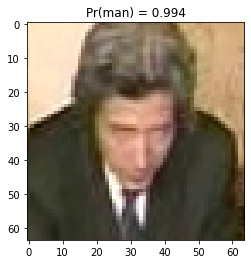

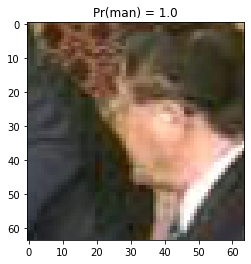

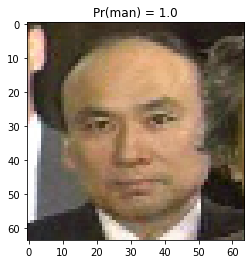

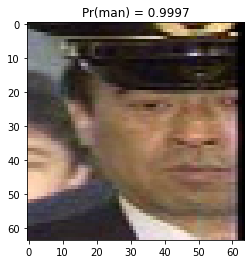

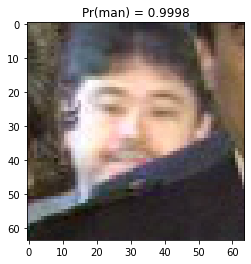

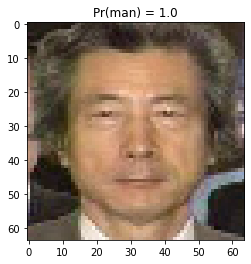

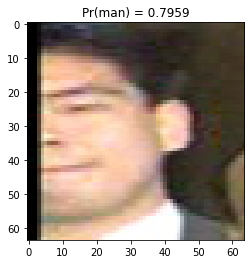

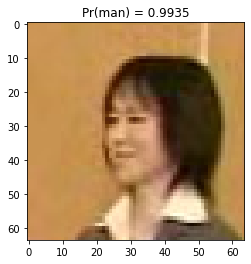

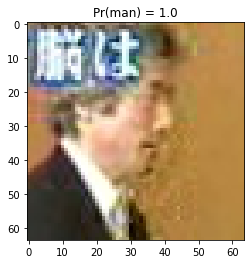

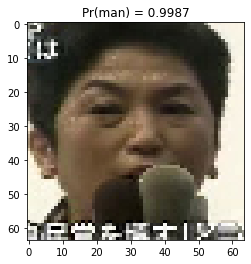

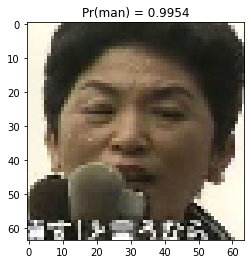

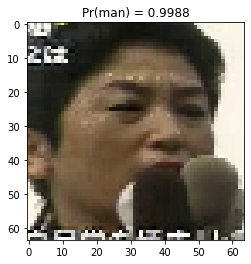

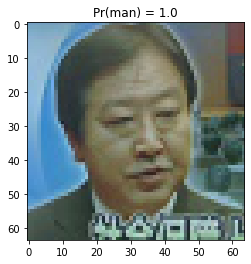

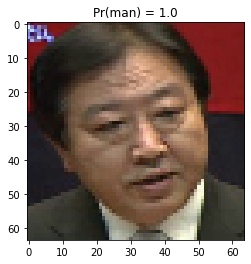

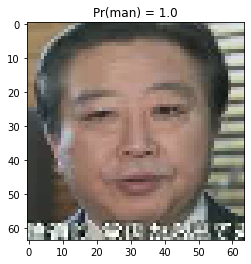

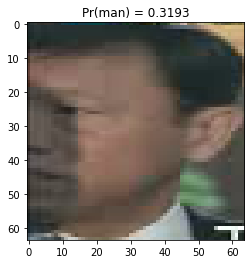

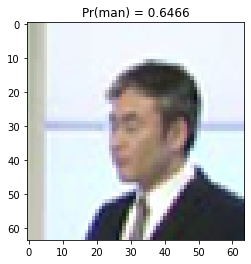

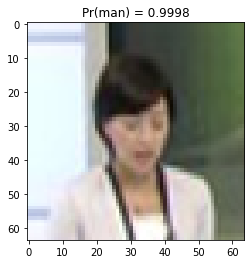

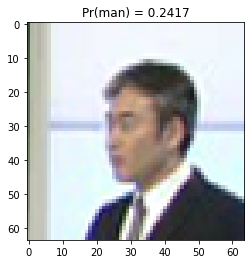

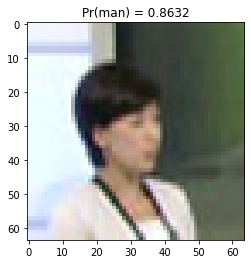

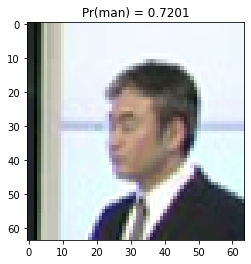

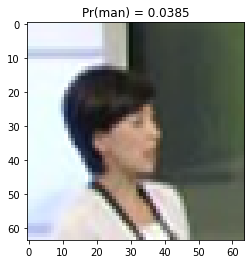

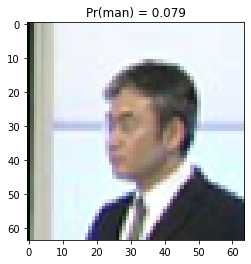

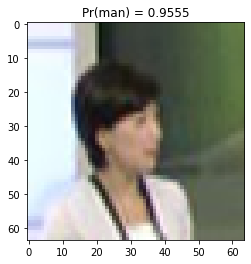

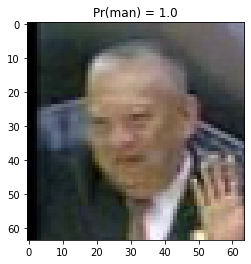

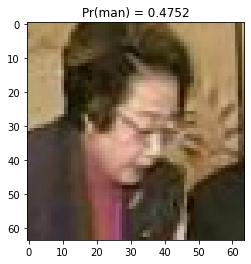

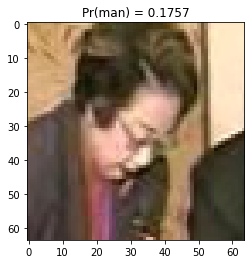

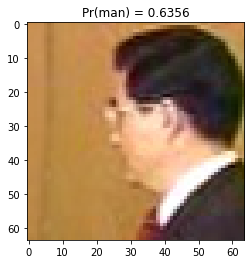

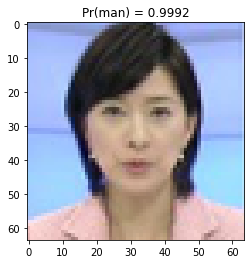

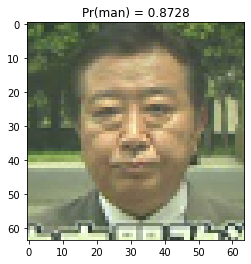

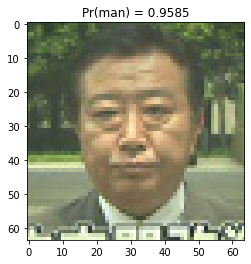

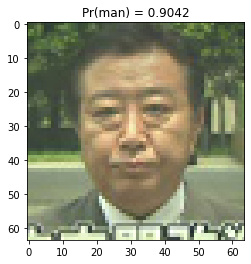

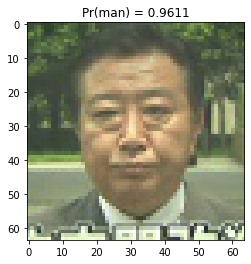

Accuracy: 0.75


In [4]:
model_offtheshelf = GenRec()
model_offtheshelf.load_state_dict(torch.load(f"{utils.root}checkpoints/pretrained_model_checkpoint.pth", map_location=torch.device("cpu")))

evaluate(model_offtheshelf)

In [11]:
hparams = Namespace(
    num_epochs=50,
    device=torchdevice
)

# MLP lowres-pretraining model
lowres_model_mlp = GenRec()
lowres_model_mlp.load_state_dict(torch.load(f"{utils.root}checkpoints/pretrained_model_checkpoint.pth", map_location=torch.device("cpu")))

print("Starting training of overfitting MLP model")
lowres_model_mlp.train()
optimizer = optim.Adam(lowres_model_mlp.MLP.parameters(), lr=1e-2, amsgrad=True)
_ = lowres_model_mlp.train_model(dloaders, optimizer, hparams, wb_run=None, prints=True)

Starting training of overfitting MLP model
Epoch 1/50
[train] Loss: 4.0680 | Acc: 0.5500
[valid] Loss: 0.7962 | Acc: 0.7500
Epoch 2/50
[train] Loss: 1.6814 | Acc: 0.6500
[valid] Loss: 0.6261 | Acc: 0.7500
Epoch 3/50
[train] Loss: 1.3657 | Acc: 0.6750
[valid] Loss: 0.5248 | Acc: 0.7500
Epoch 4/50
[train] Loss: 1.0144 | Acc: 0.6750
[valid] Loss: 0.4875 | Acc: 0.7750
Epoch 5/50
[train] Loss: 0.7024 | Acc: 0.7250
[valid] Loss: 0.5199 | Acc: 0.8250
Epoch 6/50
[train] Loss: 0.5649 | Acc: 0.7250
[valid] Loss: 0.5942 | Acc: 0.8250
Epoch 7/50
[train] Loss: 0.5880 | Acc: 0.7250
[valid] Loss: 0.6520 | Acc: 0.5750
Epoch 8/50
[train] Loss: 0.5543 | Acc: 0.8000
[valid] Loss: 0.6471 | Acc: 0.7250
Epoch 9/50
[train] Loss: 0.5762 | Acc: 0.8000
[valid] Loss: 0.6337 | Acc: 0.8000
Epoch 10/50
[train] Loss: 0.5713 | Acc: 0.8000
[valid] Loss: 0.6167 | Acc: 0.8000
Epoch 11/50
[train] Loss: 0.5539 | Acc: 0.8000
[valid] Loss: 0.5964 | Acc: 0.8000
Epoch 12/50
[train] Loss: 0.5447 | Acc: 0.8000
[valid] Loss: 0.5

In [13]:
lowres_model_mlp.eval()

for x,_ in tr_dloader:
    embd_lowres_mlp = pd.DataFrame.from_records(lowres_model_mlp.FE(x).detach().numpy())

embd_lowres_mlp.shape

(40, 512)

In [15]:
umap_3dvideo(embd_lowres_mlp, name="3d_embd_space_lowres_mlp")

100%|██████████| 126/126 [02:44<00:00,  1.30s/it]
